In [176]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import importlib
import speccy as gary
import random

In [192]:
importlib.reload(gary.dwelch)

<module 'speccy.dwelch' from '/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/speccy/dwelch.py'>

## Sample data
Set parameters and generate an AR(4) process

In [186]:
random.seed(2)

m = 2**6
l = 2**9
overlap = 0
s = l * (1 - overlap)
n = (m - 1) * s + l
delta = 1
k = int(l/4)

phis = np.array([2.7607, -3.8106, 2.6535, -0.9238])
sd = 1

sampled_ar = gary.sample.sample_ar(n, phis, sd)

Define two tapers that we'll look at and calculate Welch's estimate of the AR process. We will show results for the boxcar and Hamming tapers side-by-side.

Text(0.5, 0, 'Frequency [Hz]')

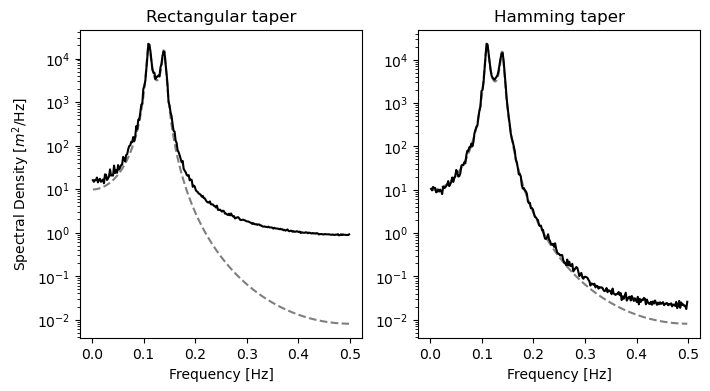

In [213]:
h_hm = signal.windows.hamming(l)
h_bc = np.repeat(1, l)

f, pw_bc = gary.dwelch.pwelch(sampled_ar, m, l, s, h=h_bc)
f, pw_hm = gary.dwelch.pwelch(sampled_ar, m, l, s, h=h_hm)

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(f, pw_bc, c="k")
plt.plot(f, gary.psd.ar(f, np.concatenate([[sd], phis])), c="k", alpha = 0.5, linestyle="dashed")
plt.yscale('log')
plt.title("Rectangular taper")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral Density [$m^2$/Hz]")

plt.subplot(122)
plt.plot(f, pw_hm, c="k")
plt.plot(f, gary.psd.ar(f, np.concatenate([[sd], phis])), c="k", alpha = 0.5, linestyle="dashed")
plt.yscale('log')
plt.title("Hamming taper")
plt.xlabel("Frequency [Hz]")

### Calculate debiased Welch estimate

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/speccy/dwelch.py:19: RuntimeWarning: invalid value encountered in divide
  value = np.sin(x)/x


Text(0.5, 0, 'Frequency [Hz]')

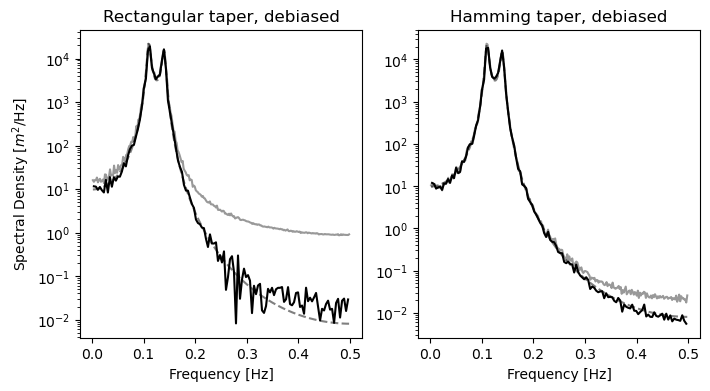

In [214]:
centres, dw_bc = gary.dwelch.dwelch(sampled_ar, m, l, s, k, h=h_bc)
centres, dw_hm = gary.dwelch.dwelch(sampled_ar, m, l, s, k, h=h_hm)

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(f, pw_bc, c="k", alpha = 0.4)
plt.plot(centres, dw_bc, c="k")
plt.plot(f, gary.psd.ar(f, np.concatenate([[sd], phis])), c="k", alpha = 0.5, linestyle="dashed")
plt.yscale('log')
plt.title("Rectangular taper, debiased")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Spectral Density [$m^2$/Hz]")

plt.subplot(122)
plt.plot(f, pw_hm, c="k", alpha = 0.4)
plt.plot(centres, dw_hm, c="k")
plt.plot(f, gary.psd.ar(f, np.concatenate([[sd], phis])), c="k", alpha = 0.5, linestyle="dashed")
plt.yscale('log')
plt.title("Hamming taper, debiased")
plt.xlabel("Frequency [Hz]")